In [1]:
import pickle
import numpy as np
import pandas as po
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
df = po.read_pickle('data/v2/full.pkl')
df = df[~df.index.duplicated(keep='first')] 
df

,consumption
time,
2017-01-01 00:00:00,NaN
2017-01-01 00:15:00,NaN
2017-01-01 00:30:00,NaN
2017-01-01 00:45:00,NaN
2017-01-01 01:00:00,NaN
...,...
2019-11-04 23:00:00,102064.379714
2019-11-04 23:15:00,100378.796042
2019-11-04 23:30:00,98593.460339


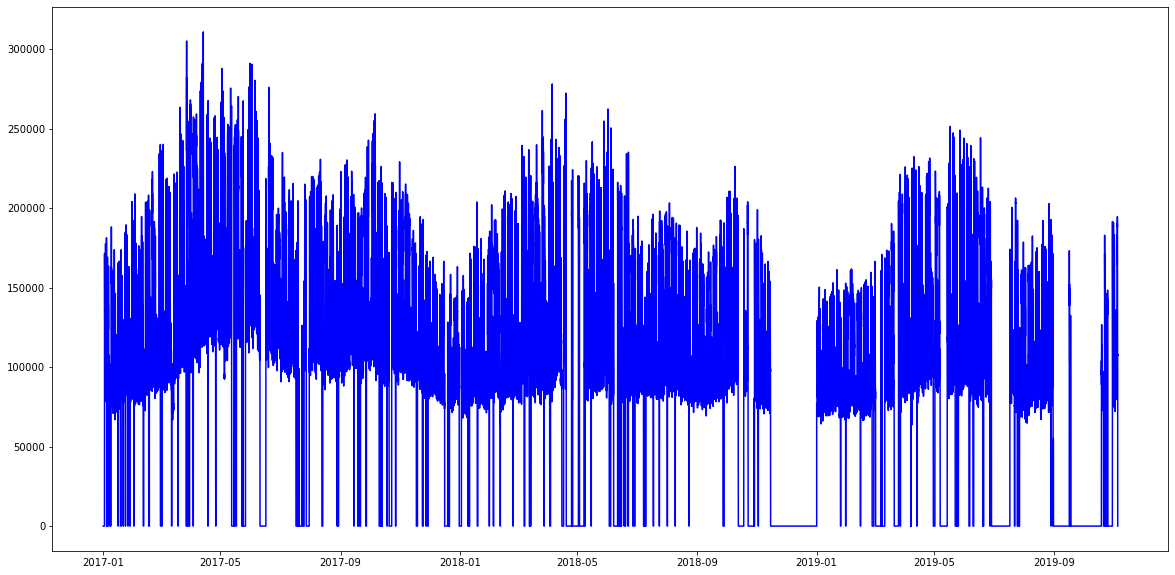

In [3]:
plt.figure(figsize=(20, 10))
plt.plot(df['consumption'].fillna(0), color='blue')

In [4]:
# Percentage of missing values
df.isnull().sum()[0]*100/len(df)

24.089554335718372

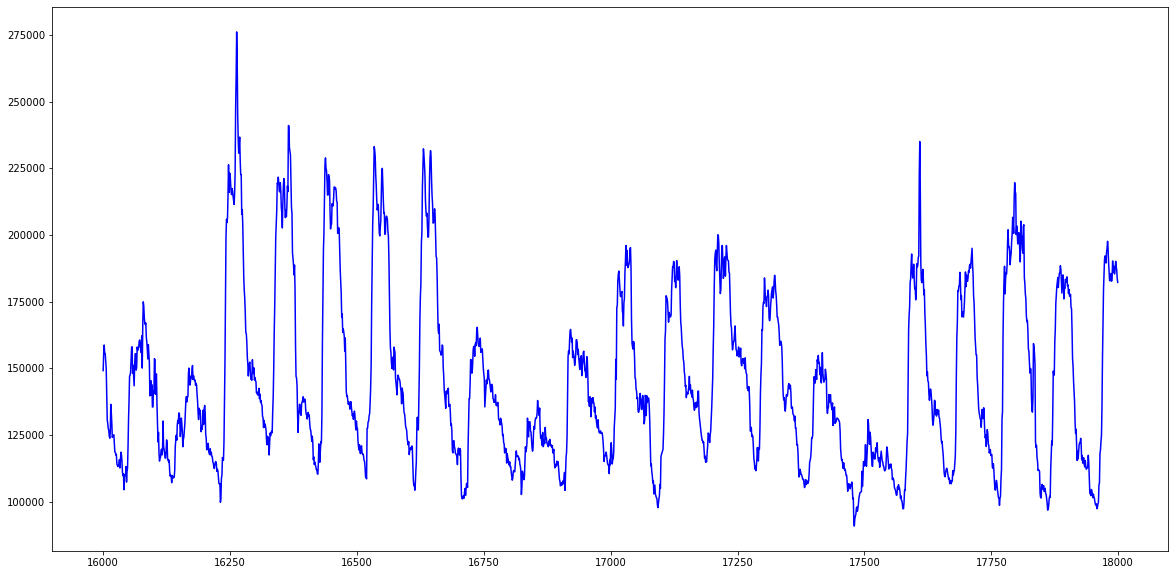

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(df['consumption'].reset_index(drop=True)[16000:18000].fillna(0), color='blue')

In [6]:
test_sample = df['consumption'].iloc[16000:18000]#.reset_index(drop=True)
test_sample

time
2017-06-16 16:00:00    149114.085000
2017-06-16 16:15:00    155648.104667
2017-06-16 16:30:00    158708.776667
2017-06-16 16:45:00    155272.784667
2017-06-16 17:00:00    155539.270667
                           ...      
2017-07-07 10:45:00    190118.154000
2017-07-07 11:00:00    188172.823333
2017-07-07 11:15:00    186900.592667
2017-07-07 11:30:00    183718.716000
2017-07-07 11:45:00    182221.864286
Name: consumption, Length: 2000, dtype: float64

In [7]:
#test_sample.to_pickle('missing_value_analysis/test_sample.pkl')

In [8]:
start = np.random.randint(low=0, high=len(test_sample)-500)
test_sample_masked = test_sample.copy()
test_sample_masked[start:start+500] = None

In [9]:
len(test_sample_masked)

2000

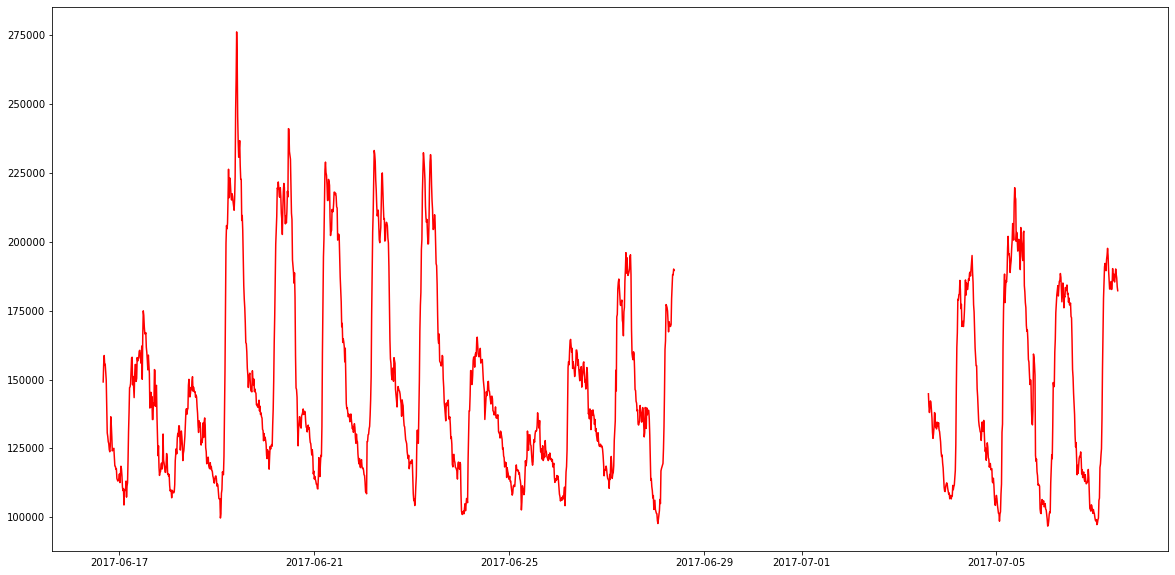

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(test_sample_masked, color='red')
#plt.plot(test_sample, color='blue')

In [13]:
with open('missing_value_analysis/edtwbi_imputed.pkl', 'rb') as f:
    edtwbi_imputed = pickle.load(f)

In [23]:
test_sample#.reset_index(drop=True).iloc[16000+start:16000+start+500]

time
2017-06-16 16:00:00    149114.085000
2017-06-16 16:15:00    155648.104667
2017-06-16 16:30:00    158708.776667
2017-06-16 16:45:00    155272.784667
2017-06-16 17:00:00    155539.270667
                           ...      
2017-07-07 10:45:00    190118.154000
2017-07-07 11:00:00    188172.823333
2017-07-07 11:15:00    186900.592667
2017-07-07 11:30:00    183718.716000
2017-07-07 11:45:00    182221.864286
Name: consumption, Length: 2000, dtype: float64

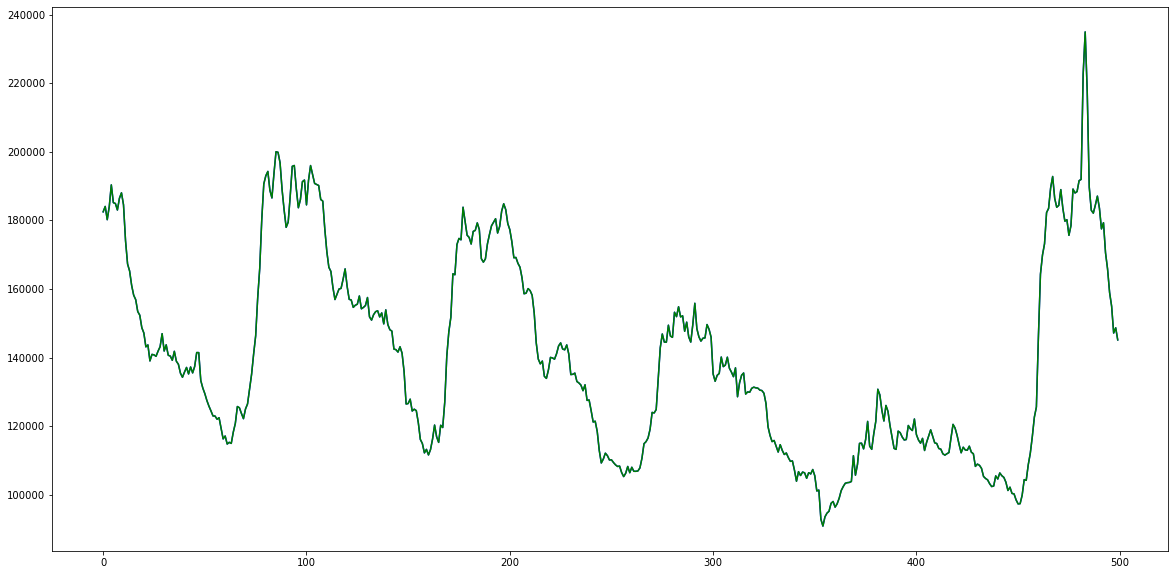

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(edtwbi_imputed[16000+start:16000+start+500], color='blue')
#plt.plot(test_sample_masked.reset_index(drop=True), color='red')
plt.plot(test_sample.to_list()[start:start+500], color='green')

[163656.01642857143,
 162019.46666666667,
 165996.64466666666,
 169991.0753333333,
 162233.2373333333,
 162238.33733333333,
 167691.2086666667,
 165590.91466666668,
 168747.05866666665,
 163481.364,
 163622.622,
 151221.42866666664,
 159025.88266666664,
 151236.554,
 153842.55333333334,
 148211.03214285712,
 149562.82133333336,
 154072.12533333336,
 156241.66266666664,
 157549.662,
 153410.104,
 150594.76666666666,
 156611.81,
 142988.21133333334,
 142673.18333333332,
 143895.728,
 136733.42,
 134800.81733333334,
 137337.71999999997,
 134710.74266666666,
 135930.97352941177,
 138054.57093333334,
 131201.27685714286,
 133770.44906666668,
 132937.2633333333,
 130261.53173333332,
 127545.20260000002,
 130458.12866666664,
 125575.49233333331,
 131324.67026666665,
 129575.97466666669,
 129473.51253333334,
 130798.49539999999,
 132677.99999999997,
 133977.11266666665,
 137663.08066666668,
 148296.798,
 156064.01714285713,
 169279.85733333332,
 172560.42733333335,
 187544.71266666666,
 203851